In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

In [2]:
# Нехай все населення (N індивідів) ділиться на три групи: 
# індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) — S(t); 
# заражені індивіди (infected) - I(t)(вони хворі самі і є носіями хвороби) 
# і здорові індивіди, які мають імунітет до цієї хвороби (recovered) - R (t) 

alpha=0.5 # коефіцієнт захворюваності
beta = 0.3 # коефіцієнт одужання
N=1000000
S0=990000
I0 = 7000
R0 = 3000
t0=0
tf=25

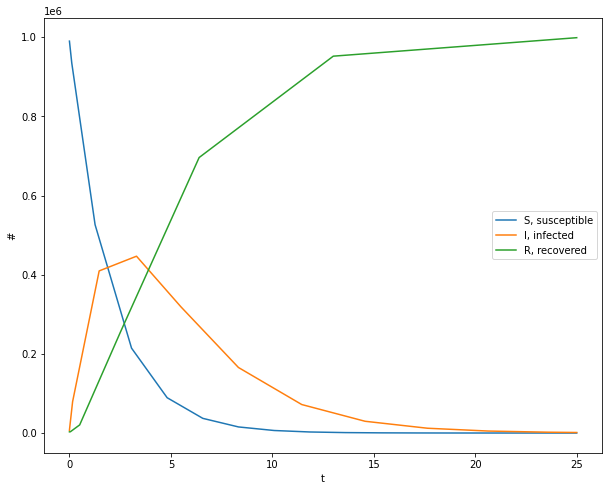

In [20]:
# Побудувати всі три графіки S(t), I(t) і R(t) на одній області відображення

def dsdt(t, s):
    return -alpha * s

def didt(t, i):
    return alpha * soln_s.sol(t) - beta * i

def drdt(t, r):
    return beta * soln_i.sol(t)

fig, ax = plt.subplots(figsize=(10, 8))
soln_s = solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)
t1, s = soln_s.t, soln_s.y[0]
plt.plot(t1, s, label='S, susceptible')

soln_i = solve_ivp(didt, (t0, tf), [I0], dense_output=True)
t2, i = soln_i.t, soln_i.y[0]
plt.plot(t2, i, label='I, infected', )

soln_r = solve_ivp(drdt, (t0, tf), [R0], dense_output=True)
t3, r = soln_r.t, soln_r.y[0]
plt.plot(t3, r, label='R, recovered', )
plt.xlabel('t')
plt.ylabel('#')
plt.legend()
plt.show()

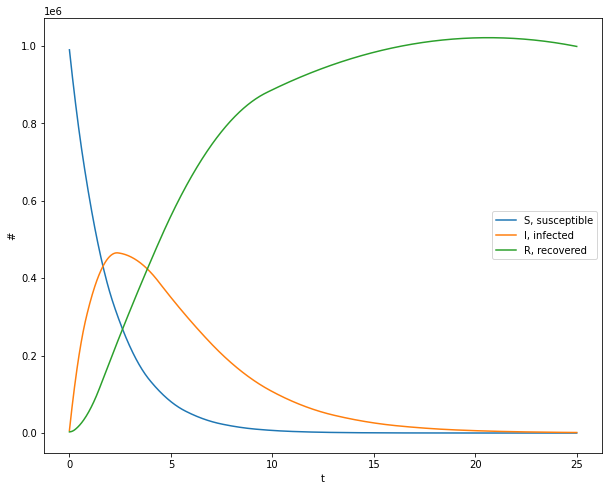

In [21]:
t4 = np.linspace(0, 25, 1000)
s_t = interp1d(t1, s, kind='quadratic')
i_t = interp1d(t2, i, kind='quadratic')
r_t = interp1d(t3, r, kind='quadratic')

fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(t4, s_t(t4), label='S, susceptible')
plt.plot(t4, i_t(t4), label='I, infected')
plt.plot(t4, r_t(t4), label='R, recovered')
plt.xlabel('t')
plt.ylabel('#')
plt.legend()
plt.show()